In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

from semisupervised import selftraining

In [2]:
train_labeled = pd.read_csv('train_labeled.csv')
train_unlabeled = pd.read_csv('train_unlabeled.csv')
test = pd.read_csv('test.csv')

In [3]:
text = pd.concat([train_labeled['Headline'], train_unlabeled['Headline'], test['Headline']]).reset_index(drop=True)

In [4]:
vectorizer = TfidfVectorizer()
vectorizer.fit(text)
X_labeled = vectorizer.transform(train_labeled['Headline'])
X_test = vectorizer.transform(test['Headline'])

In [5]:
models = {
    'svm' : SVC(C=100, gamma=1),
    'bnb' : BernoulliNB(),
}

def trainModel(model, X_train, y_train, X_test, y_test):
    modelScores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        modelScores[name] = accuracy_score(y_test, pred)
    return modelScores
modelScores = trainModel(model=models, X_train=X_labeled, y_train=train_labeled['Label'], X_test=X_test, y_test=test['Label'])

scores = pd.DataFrame(modelScores.items(), columns=['model', 'score'])
scores

,model,score
0,svm,0.717957
1,bnb,0.599132


In [6]:
df = pd.concat([train_labeled, train_unlabeled])

In [7]:
model = selftraining(SVC(probability=True, C=100))

In [8]:
X_labeled = df[df['Label'].notnull()]['Headline']
y_labeled = df[df['Label'].notnull()]['Label']
X_unlabeled = df[df['Label'].isnull()]['Headline'].reset_index(drop=True)
y_unlabeled = df[df['Label'].isnull()]['Label'].reset_index(drop=True)
X_test = test['Headline']
y_test = test['Label']

model._add_data(X_labeled, y_labeled, X_unlabeled, y_unlabeled, X_test, y_test)

In [9]:
model.build_vectorizer(text)

In [10]:
model.fit(transform=True)
model.predict_and_evaluate(transform=True)

Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7176234979973297


Iteration - 0
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.715287049399199
Iteration - 1
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7229639519359146
Iteration - 2
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7273030707610146
Iteration - 3
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.722630173564753
Iteration - 4
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7232977303070761
Iteration - 5
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7296395193591455
Iteration - 6
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7306408544726302
Iteration - 7
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.732977303070761
Iteration - 8
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7316421895861148
Iteration - 9
Model Evaluation : 
Classifier 1 accuracy sc

Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7416555407209613
Iteration - 79
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.739652870493992
Iteration - 80
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7409879839786382
Iteration - 81
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7433244325767691
Iteration - 82
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7409879839786382
Iteration - 83
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7409879839786382
Iteration - 84
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7409879839786382
Iteration - 85
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7399866488651535
Iteration - 86
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 1.0
	Test : 0.7399866488651535
Iteration - 87
Model Evaluation : 
Classifier 1 accuracy score

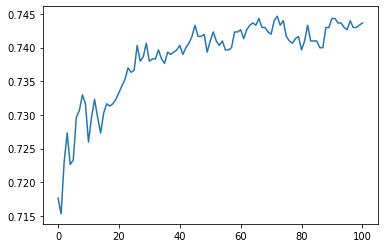

In [11]:
model.iterations(loops=100, threshold=0.75, transform=True)

In [12]:
model = selftraining(BernoulliNB(alpha=1, binarize=0.01))

In [13]:
X_labeled = df[df['Label'].notnull()]['Headline']
y_labeled = df[df['Label'].notnull()]['Label']
X_unlabeled = df[df['Label'].isnull()]['Headline'].reset_index(drop=True)
y_unlabeled = df[df['Label'].isnull()]['Label'].reset_index(drop=True)
X_test = test['Headline']
y_test = test['Label']

model._add_data(X_labeled, y_labeled, X_unlabeled, y_unlabeled, X_test, y_test)

In [14]:
model.build_vectorizer(text)

In [15]:
model.fit(transform=True)
model.predict_and_evaluate(transform=True)

Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.66110183639399
	Test : 0.5991321762349799


Iteration - 0
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.632183908045977
	Test : 0.5874499332443258
Iteration - 1
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.6409348441926346
	Test : 0.5864485981308412
Iteration - 2
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.663594470046083
	Test : 0.5864485981308412
Iteration - 3
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.6857318573185732
	Test : 0.5864485981308412
Iteration - 4
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.7045585689555683
	Test : 0.5864485981308412
Iteration - 5
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.7217391304347827
	Test : 0.5864485981308412
Iteration - 6
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.7370313302516692
	Test : 0.5864485981308412
Iteration - 7
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.750730282375852
	Test : 0.5864485981308412
Iteration - 8
Model Evaluation : 
Classifie

Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.9403332944878219
	Test : 0.5864485981308412
Iteration - 69
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.9410681399631676
	Test : 0.5864485981308412
Iteration - 70
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.941785105173394
	Test : 0.5864485981308412
Iteration - 71
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.9424848348685688
	Test : 0.5864485981308412
Iteration - 72
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.9431679431679432
	Test : 0.5864485981308412
Iteration - 73
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.9438350153576129
	Test : 0.5864485981308412
Iteration - 74
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.9444866095630489
	Test : 0.5864485981308412
Iteration - 75
Model Evaluation : 
Classifier 1 accuracy score : 
	Train : 0.9451232583065381
	Test : 0.5864485981308412
Iteration - 76
Model Evaluation : 
Classifier 1 

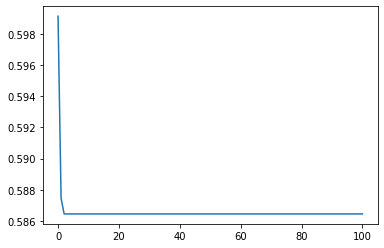

In [16]:
model.iterations(loops=100, threshold=0.75, transform=True)